In [1]:
import pandas as pd

In [2]:
# importando dados
df = pd.ExcelFile('AR_BR_RG_UF_MES_MIC_MUN_2017.xls')

In [3]:
df.parse(0).head()

,ID,CD_GCUF,NM_UF,NM_UF_SIGLA,CD_GCMUN,NM_MUN_2017,AR_MUN_2017
0,1.0,11.0,Rondônia,RO,1100015.0,ALTA FLORESTA D'OESTE,7067.025
1,2.0,11.0,Rondônia,RO,1100023.0,ARIQUEMES,4426.571
2,3.0,11.0,Rondônia,RO,1100031.0,CABIXI,1314.353
3,4.0,11.0,Rondônia,RO,1100049.0,CACOAL,3792.948
4,5.0,11.0,Rondônia,RO,1100056.0,CEREJEIRAS,2783.300


In [4]:
df.parse(0).tail()

,ID,CD_GCUF,NM_UF,NM_UF_SIGLA,CD_GCMUN,NM_MUN_2017,AR_MUN_2017
5570,5571.0,52.0,Goiás,GO,5222302.0,VILA PROPÍCIO,2181.583
5571,5572.0,53.0,Distrito Federal,DF,5300108.0,BRASÍLIA,5779.997
5572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5574,NaN,NaN,NaN,NaN,NaN,NaN,8515759.090


In [5]:
df.parse(0)['AR_MUN_2017'].iloc[:-3].to_frame().to_csv('coluna_benford.csv', index=False, encoding='utf-8')

In [6]:
!ls

API.ipynb                        Postman2.png
AR_BR_RG_UF_MES_MIC_MUN_2017.xls Postman3.png
Arquivos Finais                  Postman4.png
Benford.ipynb                    Postman5.png
Exceptions.ipynb                 Postman6.png
Flask.ipynb                      Postman7.png
MYSQL                            Postman8.png
Postman1.png                     Postman9.png
Postman10.png                    api.png
Postman11.png                    coluna_benford.csv
Postman12.png


In [7]:
pd.read_csv('coluna_benford.csv').shape

(5572, 1)

In [9]:
class Benford():
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    
    def __init__(self, nome_arquivo):
        self.dados = pd.read_csv(nome_arquivo)
        assert self.dados.shape[1] == 1, "O DataFrame tem mais de 1 coluna"
            
        self.benford = self.np.zeros(9)
        for i in range(9):
            self.benford[i]  = self.np.log10(i + 2) - self.np.log10(i + 1)
        
    def fit(self):
        self.benford_grafico = pd.DataFrame(index=range(1,10))
        self.benford = self.benford * self.dados.shape[0]
        self.benford_grafico['Esperado'] = self.benford
        self.observado = self.dados.iloc[:,0].astype(str).map(lambda x: x[0]).value_counts().values
        assert self.observado.size == 9, 'Verificar valores fora do padrão aceitável {}'.format(self.dados.iloc[:,0].astype(str).map(lambda x: x[0]).value_counts().index.values)
        self.benford_grafico['Observado'] = self.observado
        self.benford_grafico.plot.bar(figsize=[12,8], title='Suicídios', )
        self.plt.xticks(list(range(9)),list(range(1,10)))
        self.plt.xlabel('Dígitos',labelpad=15)
        self.qui_quadrado = ((self.observado - self.benford)**2 / self.benford).sum()
        if self.qui_quadrado > 15.5:
            print("Possível manipulação de Dados. Rejeitamos Ho: {}".format(self.qui_quadrado))
        else:
            print("Não há evidências de manipulação de Dados. Aceitamos Ho: {}".format(self.qui_quadrado))
        self.plt.title('Qui-quadrado: {}'.format(self.qui_quadrado))
        self.plt.savefig('benford.png')
        self.plt.show()

$$\chi _{k}^{2}\equiv \sum _{{j=1}}^{n}{\frac  {(O_{j}-E_{j})^{2}}{E_{j}}}$$

In [16]:
pd.read_excel('AR_BR_RG_UF_MES_MIC_MUN_2017.xls', encoding='latin1').to_csv('tabela.csv', encoding='utf-8')

In [17]:
!ls *.csv

coluna_benford.csv tabela.csv


In [19]:
teste = Benford('coluna_benford.csv')

Possível manipulação de Dados. Rejeitamos Ho: 17.588527427395498


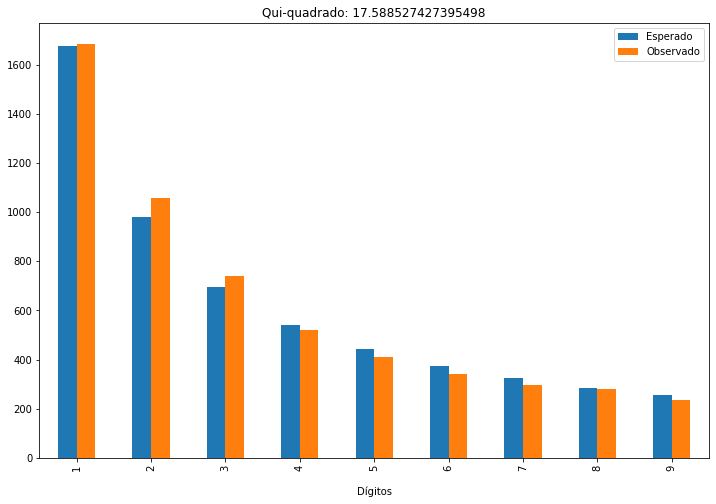

In [20]:
teste.fit()